<a href="https://colab.research.google.com/github/WorkaholicCat/UCS654_Assignments/blob/main/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

data = np.array([
    [24, 0.31, 80, 0.5, 35],
    [27, 0.34, 120, 1.3, 28],
    [29, 0.36, 160, 6, 24],
    [31, 0.38, 150, 7, 20],
    [30, 0.37, 140, 7, 22]
])

models = ["GPT-2", "GPT-Neo", "GPT-J", "LLaMA-2", "Falcon-7B"]

norm = data / np.sqrt((data**2).sum(axis=0))

weights = np.array([0.25, 0.20, 0.15, 0.15, 0.25])
weighted = norm * weights

benefit = [0,1]
cost = [2,3,4]

ideal = np.zeros(weighted.shape[1])
negative = np.zeros(weighted.shape[1])

for i in range(weighted.shape[1]):
    if i in benefit:
        ideal[i] = weighted[:,i].max()
        negative[i] = weighted[:,i].min()
    else:
        ideal[i] = weighted[:,i].min()
        negative[i] = weighted[:,i].max()

s_p = np.sqrt(((weighted - ideal)**2).sum(axis=1))
s_n = np.sqrt(((weighted - negative)**2).sum(axis=1))

scores = s_n / (s_p + s_n)

result = pd.DataFrame({
    "Model": models,
    "TOPSIS Score": scores
}).sort_values(by="TOPSIS Score", ascending=False)

print(result)


       Model  TOPSIS Score
1    GPT-Neo      0.648433
0      GPT-2      0.564444
3    LLaMA-2      0.441735
4  Falcon-7B      0.412325
2      GPT-J      0.391263


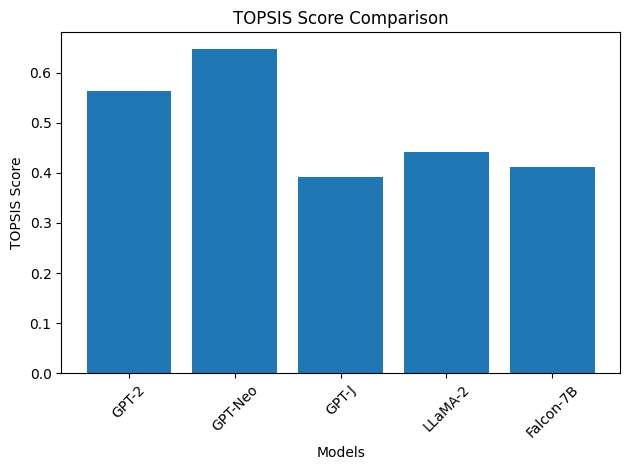

In [2]:
import matplotlib.pyplot as plt

models = ["GPT-2", "GPT-Neo", "GPT-J", "LLaMA-2", "Falcon-7B"]
topsis_scores = scores

plt.figure()
plt.bar(models, topsis_scores)

plt.title("TOPSIS Score Comparison")
plt.xlabel("Models")
plt.ylabel("TOPSIS Score")
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("topsis_comparison.png")  # Saves the graph
plt.show()
